# Geophysical Experiments in the mineshaft
## Gravity

We are going to use make use of the `pandas` library that is excellent for manipulating data sheets (table data).
Additionally, we use `numpy` for array computations and `matplotlib` for plotting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, we read in the data and show it.

In [16]:
df = pd.read_csv("group4.csv")
print(df)
print(df["time"].array)

  point   depth      grav     sd      time
0    P0  147.51  4859.905  0.038  07:46:56
1    P1  100.93  4855.604  0.017  07:56:59
2    P2   66.52  4852.247  0.031  08:04:52
3    P3    0.00  4844.748  0.016  08:14:27
4    P0  147.51  4860.048  0.018  08:25:13
5    P1  100.93  4855.734  0.025  08:42:41
6    P2   66.52  4852.373  0.023  08:53:06
7    P3    0.00  4844.871  0.015  09:05:05
8    P0  147.51  4860.150  0.020  09:18:18
<NumpyExtensionArray>
['07:46:56', '07:56:59', '08:04:52', '08:14:27', '08:25:13', '08:42:41',
 '08:53:06', '09:05:05', '09:18:18']
Length: 9, dtype: object


Here, we see that the time vector are strings. For interpolation, we convert it into a datetime object.

In [17]:
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S")
print(df)
print(df["time"].array)

  point   depth      grav     sd                time
0    P0  147.51  4859.905  0.038 1900-01-01 07:46:56
1    P1  100.93  4855.604  0.017 1900-01-01 07:56:59
2    P2   66.52  4852.247  0.031 1900-01-01 08:04:52
3    P3    0.00  4844.748  0.016 1900-01-01 08:14:27
4    P0  147.51  4860.048  0.018 1900-01-01 08:25:13
5    P1  100.93  4855.734  0.025 1900-01-01 08:42:41
6    P2   66.52  4852.373  0.023 1900-01-01 08:53:06
7    P3    0.00  4844.871  0.015 1900-01-01 09:05:05
8    P0  147.51  4860.150  0.020 1900-01-01 09:18:18
<DatetimeArray>
['1900-01-01 07:46:56', '1900-01-01 07:56:59', '1900-01-01 08:04:52',
 '1900-01-01 08:14:27', '1900-01-01 08:25:13', '1900-01-01 08:42:41',
 '1900-01-01 08:53:06', '1900-01-01 09:05:05', '1900-01-01 09:18:18']
Length: 9, dtype: datetime64[ns]


We can use the dataframe plot function for simple plotting, noting that gravity goes down in three loops, just as we measured.

<Axes: xlabel='time'>

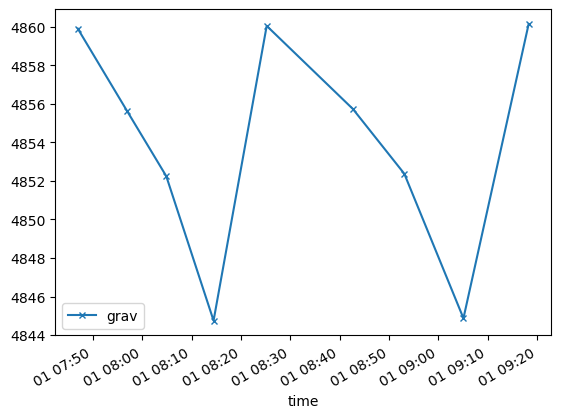

In [21]:
df.plot(x="time", y="grav", marker="x", markersize=5)

We can also plot the gravity over depth.

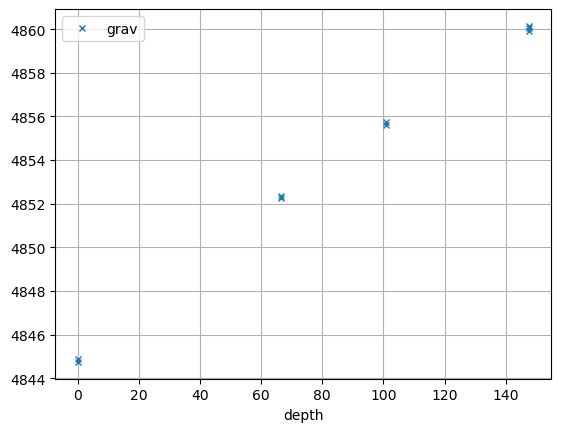

In [25]:
df.plot(x="depth", y="grav", ls="None", marker="x", markersize=5)
plt.grid()

Next, we are extracting the base point (`P0`) and plot its variation over time.

<Axes: xlabel='time'>

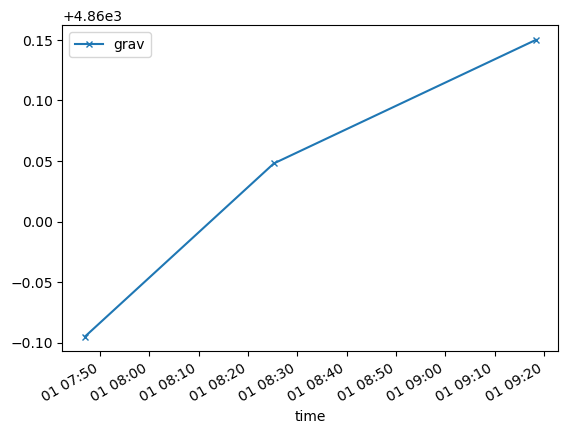

In [27]:
base = df[df["point"] == "P0"]
base.plot(x="time", y="grav", marker="x", markersize=5)


This repeated measurement is considered the variation due to external influences. We therefore interpolate it to all measuring times and subtract it from the original measurement, obtaining a relative gravity change with the result that it is zero at all P0 readings.

  point   depth      grav     sd                time           g0         dg
0    P0  147.51  4859.905  0.038 1900-01-01 07:46:56  4859.905000   0.000000
1    P1  100.93  4855.604  0.017 1900-01-01 07:56:59  4859.942540  -4.338540
2    P2   66.52  4852.247  0.031 1900-01-01 08:04:52  4859.971987  -7.724987
3    P3    0.00  4844.748  0.016 1900-01-01 08:14:27  4860.007783 -15.259783
4    P0  147.51  4860.048  0.018 1900-01-01 08:25:13  4860.048000   0.000000
5    P1  100.93  4855.734  0.025 1900-01-01 08:42:41  4860.081562  -4.347562
6    P2   66.52  4852.373  0.023 1900-01-01 08:53:06  4860.101578  -7.728578
7    P3    0.00  4844.871  0.015 1900-01-01 09:05:05  4860.124604 -15.253604
8    P0  147.51  4860.150  0.020 1900-01-01 09:18:18  4860.150000   0.000000


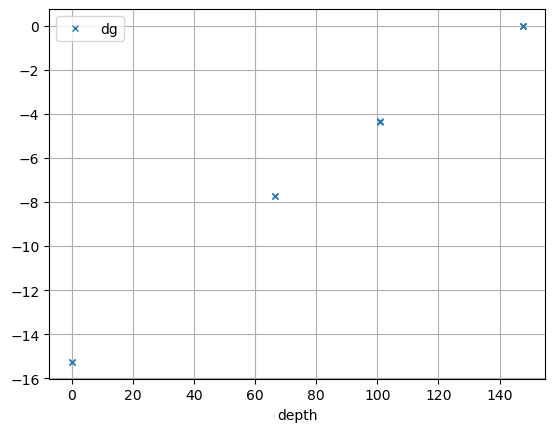

In [35]:
df["g0"] = np.interp(df.time, base.time, base.grav)
df["dg"] = df.grav - df.g0
print(df)
ax = df.plot("depth", "dg", ls="None", marker="x", markersize=5)
ax.grid()

With those values we can compute the gravity gradients between subsequent levels and from that the interval density. Tip: fit a straight line by regression and use the slope. 
In order to get correct results, we need to correct the effects of the voids in the mine and the stockpile.